# Performing DEG analysis (limma, R) on DC2 bulk data

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/sc_AllDC')

## Load data:

In [3]:
#load data
sampleinfo <- read.csv("sample_info_DC2.csv", row.names =1)
head(sampleinfo)

,sample_id,group
,<chr>,<chr>
cDC1_OP9_rep1,cDC1_OP9_rep1,OP9_DC1
cDC1_OP9_rep2,cDC1_OP9_rep2,OP9_DC1
cDC1_OP9_rep3,cDC1_OP9_rep3,OP9_DC1
cDC2_OP9_rep1,cDC2_OP9_rep1,OP9_DC2
cDC2_OP9_rep2,cDC2_OP9_rep2,OP9_DC2


In [4]:
dim(sampleinfo)

[1] 5 2

In [5]:
cts <- read.csv("salmon_gene_counts_normalized_DC2.csv")

In [6]:
# make the gene symbols unique
cts[,2] <- make.names(cts[,2], unique = TRUE)
genes <- cts[,c(2,1)]
# switch the rownames
row.names(cts) <- cts[,2]
cts <- cts[,-c(1:2)]
head(cts)

,cDC1_OP9_rep1,cDC1_OP9_rep2,cDC1_OP9_rep3,cDC2_OP9_rep1,cDC2_OP9_rep2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,3.835621,6.256425,5.596893,3.869836,0.6669487
TNMD,0.000000,0.000000,0.000000,0.000000,0.0000000
DPM1,2002.194228,2465.925333,1850.173040,1831.399741,1716.0590860
SCYL3,551.562318,501.407797,549.295107,520.492900,628.2657051
C1orf112,381.260740,381.641942,373.392744,155.760887,252.1066205
FGR,3748.936090,2989.677506,3399.712949,6383.293972,7417.1368440


In [7]:
dim(cts)

[1] 60240     5

In [8]:
library(limma)
library(edgeR)

In [9]:
# create DGEList variable
y <- DGEList(counts = cts, genes = genes)

In [10]:
head(y)

An object of class "DGEList"
$counts
         cDC1_OP9_rep1 cDC1_OP9_rep2 cDC1_OP9_rep3 cDC2_OP9_rep1 cDC2_OP9_rep2
TSPAN6        3.835621      6.256425      5.596893      3.869836     0.6669487
TNMD          0.000000      0.000000      0.000000      0.000000     0.0000000
DPM1       2002.194228   2465.925333   1850.173040   1831.399741  1716.0590860
SCYL3       551.562318    501.407797    549.295107    520.492900   628.2657051
C1orf112    381.260740    381.641942    373.392744    155.760887   252.1066205
FGR        3748.936090   2989.677506   3399.712949   6383.293972  7417.1368440

$samples
              group lib.size norm.factors
cDC1_OP9_rep1     1 74958249            1
cDC1_OP9_rep2     1 83704644            1
cDC1_OP9_rep3     1 77177794            1
cDC2_OP9_rep1     1 79397032            1
cDC2_OP9_rep2     1 77395283            1

$genes
         gene_name            gene_id
TSPAN6      TSPAN6 ENSG00000000003.15
TNMD          TNMD  ENSG00000000005.6
DPM1          DPM1 ENSG00000000419.13
SCYL3        SCYL3 ENSG00000000457.14
C1orf112  C1orf112 ENSG00000000460.17
FGR            FGR ENSG00000000938.13

In [11]:
dim(y)

[1] 60240     5

## Filtering:

In [12]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [13]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [ ]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 16334     5

## Normalise: 

In [15]:
y <- calcNormFactors(y)

In [ ]:
head(y)

An object of class "DGEList"
$counts
         cDC1_OP9_rep1 cDC1_OP9_rep2 cDC1_OP9_rep3 cDC2_OP9_rep1 cDC2_OP9_rep2
DPM1        2002.19423    2465.92533     1850.1730     1831.3997     1716.0591
SCYL3        551.56232     501.40780      549.2951      520.4929      628.2657
C1orf112     381.26074     381.64194      373.3927      155.7609      252.1066
FGR         3748.93609    2989.67751     3399.7129     6383.2940     7417.1368
CFH           77.47955      74.18333      123.9312     3490.5918     2262.9570
FUCA2       3201.20939    3352.55017     3641.9785     4558.6664     5161.5162

$samples
              group lib.size norm.factors
cDC1_OP9_rep1     1 74931602    1.0365496
cDC1_OP9_rep2     1 83677433    0.9100051
cDC1_OP9_rep3     1 77151251    1.0060190
cDC2_OP9_rep1     1 79366769    1.0151799
cDC2_OP9_rep2     1 77364626    1.0380467

$genes
         gene_name            gene_id
DPM1          DPM1 ENSG00000000419.13
SCYL3        SCYL3 ENSG00000000457.14
C1orf112  C1orf112 ENSG00000000460.17
FGR            FGR ENSG00000000938.13
CFH            CFH ENSG00000000971.16
FUCA2        FUCA2 ENSG00000001036.14

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

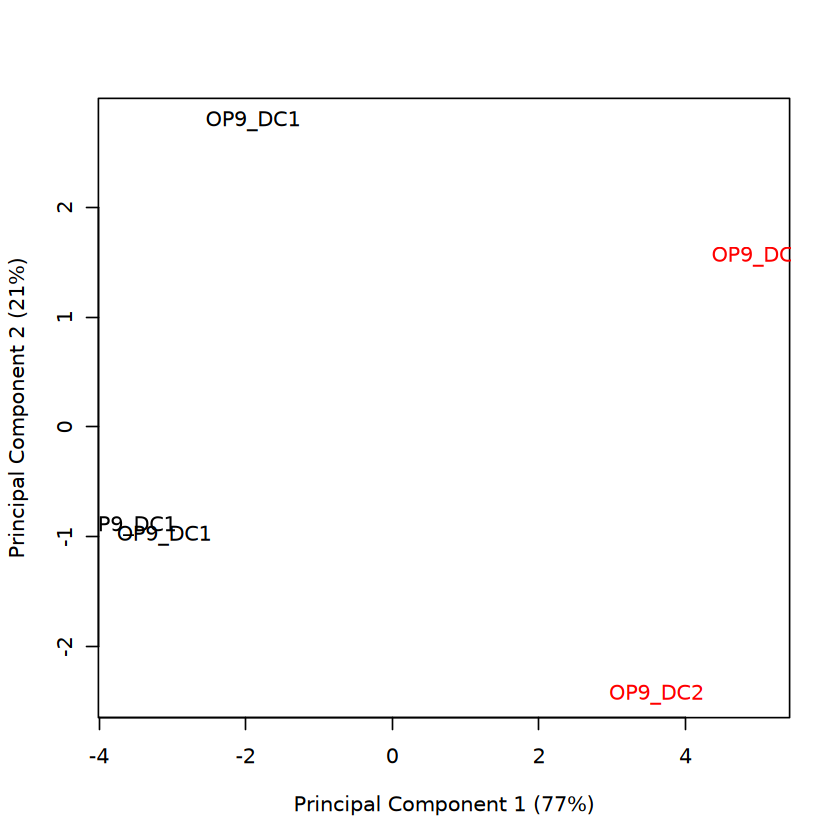

In [18]:
#checking triplicates group together (sanity check)
plotMDS(y, labels=sampleinfo$group, top=50, col=c("black", "black", "black","red","red"), gene.selection="common", prior.count = 5)

# Set up model

In [19]:
# setup model
design <- model.matrix(~ 0 + group, data = sampleinfo)

In [20]:
colnames(design) <- c("OP9_DC1","OP9_DC2")

In [21]:
head(design)

,OP9_DC1,OP9_DC2
cDC1_OP9_rep1,1,0
cDC1_OP9_rep2,1,0
cDC1_OP9_rep3,1,0
cDC2_OP9_rep1,0,1
cDC2_OP9_rep2,0,1


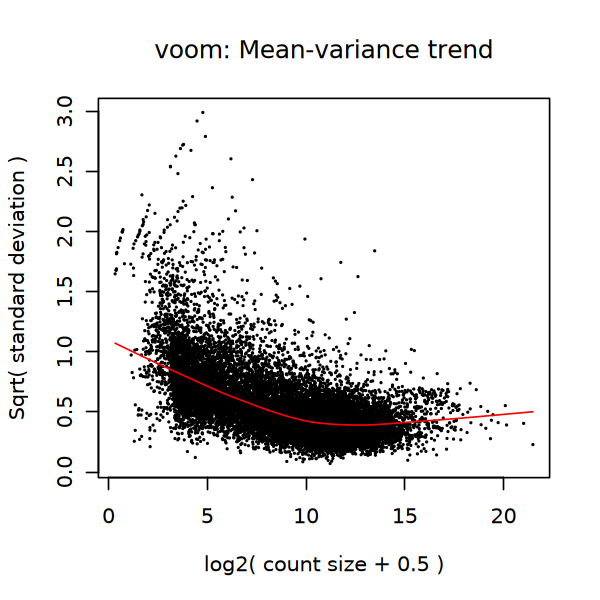

In [22]:
# voom - see here for good v bad voom plot: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html
options(repr.plot.height=5, repr.plot.width=5)
v <- voom(y, design, plot = TRUE)

In [23]:
# lmFit
fit <- lmFit(v, design)

In [29]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(OP9_DC2-OP9_DC1, levels=design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [30]:
# check the results
# coef number corresponds to the contrast order
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)

In [31]:
results <- decideTests(fit2)
summary(results)
head(tt1)

       OP9_DC2 - OP9_DC1
Down                2812
NotSig             10111
Up                  3411

,gene_name,gene_id,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IRF8,IRF8,ENSG00000140968.11,-6.235063,9.264224,-49.18215,3.827591e-09,5.734183e-05,11.342372
FLNB,FLNB,ENSG00000136068.15,-5.199216,5.817978,-41.01153,1.152406e-08,5.734183e-05,10.396087
MOB3B,MOB3B,ENSG00000120162.10,4.991186,4.544320,38.78416,1.616715e-08,5.734183e-05,10.237962
CD1E,CD1E,ENSG00000158488.16,7.144368,3.777421,42.03370,9.925895e-09,5.734183e-05,9.993633
B3GNT5,B3GNT5,ENSG00000176597.12,5.545661,5.111033,36.19484,2.457407e-08,5.734183e-05,9.947519
DOK2,DOK2,ENSG00000147443.13,6.847713,4.119658,37.60771,1.948549e-08,5.734183e-05,9.769593


In [32]:
write.csv(tt1, "DC2_vs_DC1_bulk_limma.csv", quote = FALSE, row.names = FALSE)

In [33]:
# select top 250 up, and 250 down genes from each comparison
up_genes_tt1 <- tt1 %>% filter(logFC > 0 & adj.P.Val < 0.05) %>% select(gene_name) %>% head(500) %>% unlist %>% as.character
down_genes_tt1 <- tt1 %>% filter(logFC < 0 & adj.P.Val < 0.05) %>% select(gene_name) %>% head(500) %>% unlist %>% as.character

In [34]:
plot_genes_tt1 <- c(up_genes_tt1, down_genes_tt1)

# log normalise transformed gene expression
mat_tt1 <- v$E[plot_genes_tt1, ]
dim(mat_tt1)

[1] 1000    5

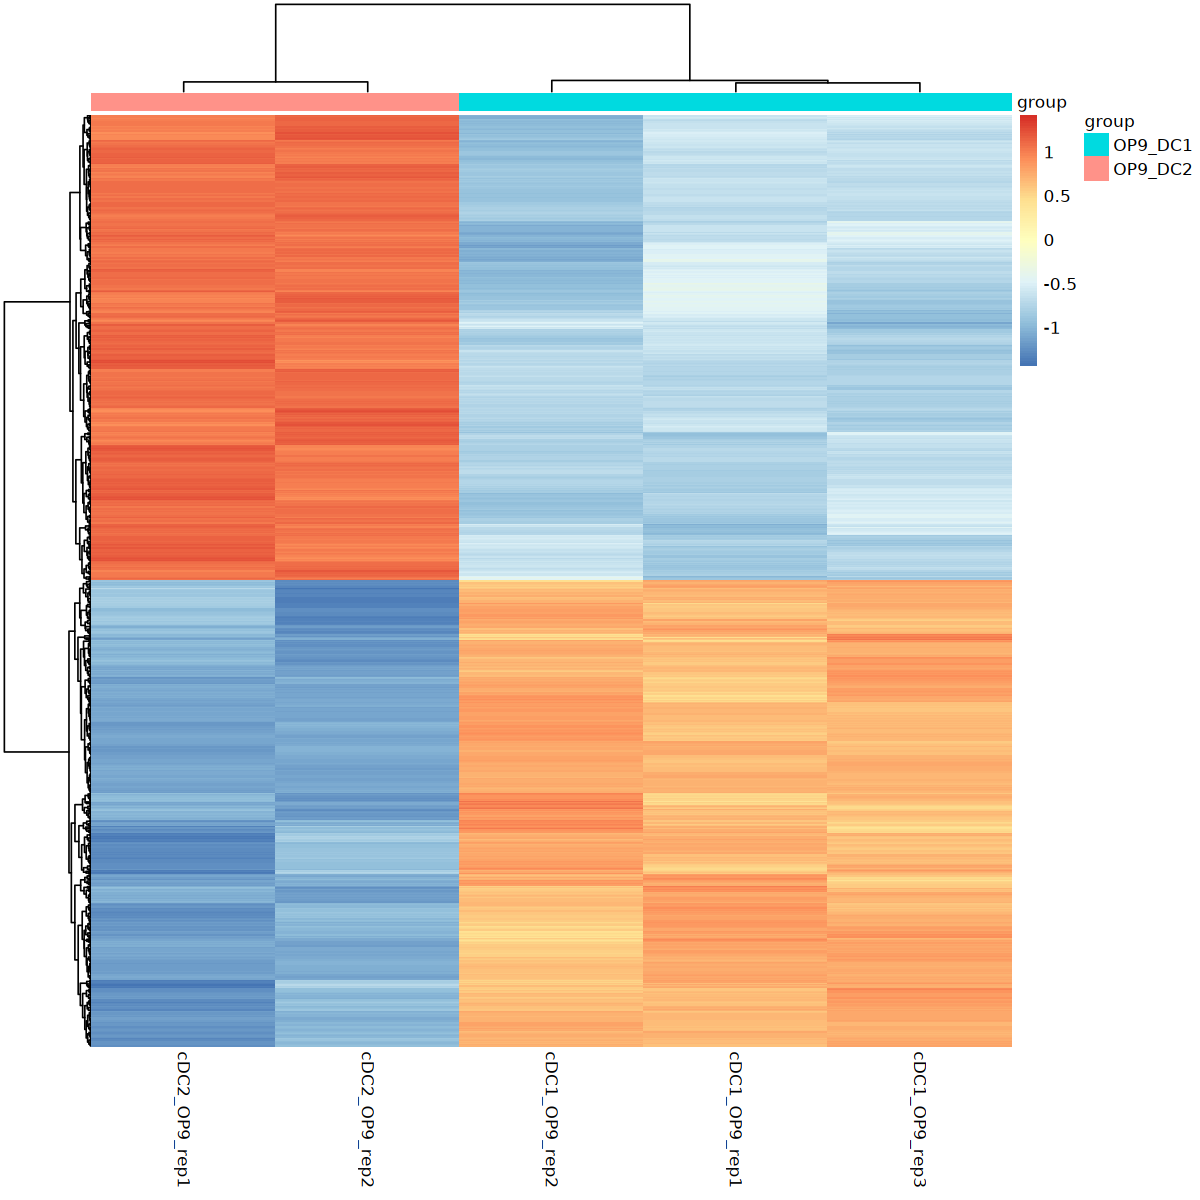

In [38]:
#make heatmap of genes for each comparison
library(pheatmap)
options(repr.plot.height=10, repr.plot.width=10)
pheatmap(mat_tt1, scale = "row", show_rownames = FALSE, annotation_col = sampleinfo[, "group", drop=FALSE])